__PyTorch for Deep Learning in 2023: Zero To Mastery (Udemy) kaynağından çalışırken alınan notlardır.__

## PyTorch Çalışma Akışı

__Faydalı Kaynaklar__

- Eğitmene ait orijinal notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
- Kitap versiyonu: https://www.learnpytorch.io/01_pytorch_workflow/
- Soru sormak için: https://github.com/mrdbourke/pytorch-deep-learning/discussions

Burada değişken isimleri İngilizce tanımlanacaktır. Metinsel içerikler Türkçe ya da İngilizce olarak yazılabilir.

In [1]:
# Bir sözlük (dictionary) tanımı.
what_were_covering = {1: "veriyi hazırlama / prepare ve yükleme / load.",
                    2: "Model oluşturma / build",
                    3: "Modeli veriye uydurma / fitting. Eğitim adımıdır.",
                    4: "Tahminler yapma ve modeli değerlendirme. Çıkarım / inference adımıdır",
                    5: "Modeli kaydetme / saving ve yükleme / loading.",
                    6: "İşlemleri bir araya getirme"}
# Burada bir önceki bölümdeki "deneysel olarak geliştirme" adımı yoktur. Ona daha sonra bakılacaktır.

# 1. data - prepare and load
# 2. build model
# 3. fitting the model to data - training.
# 4. making predictions and evaluating a model - inference.
# 5. saving a loading a model.
# 6. putting it all together.

In [2]:
what_were_covering

{1: 'veriyi hazırlama / prepare ve yükleme / load.',
 2: 'Model oluşturma / build',
 3: 'Modeli veriye uydurma / fitting. Eğitim adımıdır.',
 4: 'Tahminler yapma ve modeli değerlendirme. Çıkarım / inference adımıdır',
 5: 'Modeli kaydetme / saving ve yükleme / loading.',
 6: 'İşlemleri bir araya getirme'}

__torch.nn, Sinir ağları için PyTorch Yapılarını bize sağlar. Bu yapılar belirli katmanlardır. Örneğin; evrişimli katmanlar ya da lineer katmanlardır. Detaylı bilgi için aşağıdaki adrese bakılabilir. Uygulamalarımızda bu katmanların bir kombinasyonunu kullanırız.__

- Adres: https://pytorch.org/docs/stable/nn.html

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt # Görselleştirme için.

# PyTorch versiyonu.
torch.__version__

'1.13.0+cu117'

## 1. Veri Hazırlama (Data Preparing) ve Veri Yükleme (Data Loading)

Bir veri her türden görüntü, video, ses, metin veya DNA verisi vb. olabilir. 

Makine öğreniminde iki önemli adım şunlardır;

1. Verilerin sayısal temsillere (numerical representation) dönüşümü.
2. Bu sayısal temsillerden faydalı örüntüleri (patterns) oluşturmak için bir modelin oluşturulması (build).

Basit bir şekilde veri oluşturma için burada doğrusal(lineer) regresyon formülünü kullanacağız. Burada __ağırlık - weight ve ön yargı - bias__ olarak *bilinen - known* parametreleri kullanacağız. 

Kullanacağımız doğrusal regresyon formülü: Y = weight * x + bias. 

In [4]:
# Bilinen parametreler. Bir model bu parametreleri doğru tahmin etmek için kurulur.
weight = 0.7
bias = 0.3

In [5]:
# Veri oluşturma.
import torch
start = 0
end = 1
step = 0.02 #veriler arasındaki adım.
X = torch.arange(start, end, step).unsqueeze(dim = 1) # Unsqueeze ile ek boyut eklenir, bu gerekli olacaktır.
y = weight * X + bias

In [6]:
X[:10], len(X), X.shape, X.ndim # İlk 10 veri.

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 50,
 torch.Size([50, 1]),
 2)

In [7]:
y[:10], len(y), y.shape, y.ndim # İlk 10 veri.

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 torch.Size([50, 1]),
 2)

## 2. Verileri Eğitim ve Test Verileri Olarak Ayırmak 

Makine öğrenmesinden en önemli kavramlardan biridir. Bu aşamada veri setinde üç veri tipi mevcuttur. Bunlar;

1. Eğitim seti (training set): Oluşturduğumuz makine öğrenmesi modeli örüntüleri (patterns) buradan öğrenir. Verilerin %60 - %80 kısmı bu sete ayrılır.
2. Doğrulama seti (validation set): Model örüntüleri ayarlanır (tune). Gerekli görülürse model tekrar eğitilebilir (retrain). Bu veri setini **her zaman kullanmamız gerekmez.** Verilerin %10 - %20 kısmı bu sete ayrılır. 
3. Test seti: Modelin nihai uygulamaya ya da gerçek dünyaya hazır olup olmadığını anlama adımında kullanılacak olan verilerdir. Verilerin %10 - %20 kısmı bu sete ayrılır.

Tüm bunların yapılmasındaki nihai amaç **genellemedir**. **Genelleme**, bir makine öğrenme modelinin daha önce rastlamadığı veri ya da durumlar karşısında davranmasıdır.

In [8]:
# Eğitim / test veri ayrıtını (split) oluşturma.
train_split = int(0.8 * len(X)) # Verilerin %80'lik kısmına (40) ayrıt konulacaktır.
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"Eğitim veri seti uzunlukları: {len(X_train), len(y_train)}")
print(f"Test veri seti uzunlukları: {len(X_test), len(y_test)}")

Eğitim veri seti uzunlukları: (40, 40)
Test veri seti uzunlukları: (10, 10)


## 3. Daha İyi Anlamak: Görselleştirme

Verileri yazdırarak görsek de onlar arasındaki ilişkiyi daha iyi görmek ya da çalışma sonucunu görmek için uygulamalarımızda görselleştirmeyi kullanırız.

In [9]:
# Verileri çizdirmek için bir fonksiyon tanımlayalım.
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Tr: Eğitim verisi, test verisini çizdirme ve tahminleri karşılaştırma.
    En: Plots training data, test data and compares predictions. 
    """
    
    plt.figure(figsize = (8, 5)) #Görselleştirme boyut ayarı.
    
    # Eğitim verisi mavi renk ile çizdirilsin.
    plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Eğitim verisi") # Mavi noktalar.
    
    # Test verisi yeşil renk ile çizdirilsin.
    plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Test verisi") # Yeşil noktalar.
    
    # Tahminler üretilmiş ise;
    if predictions is not None:
        # Tahminleri çizdir.
        plt.scatter(test_data, predictions, c = "r", label = "Tahminler.") # Kırmızı noktalar.
    
    # Görselleştirmenin sol üstünde bilgi tablosu oluşturmak.
    plt.legend(prop = {"size" : 10})

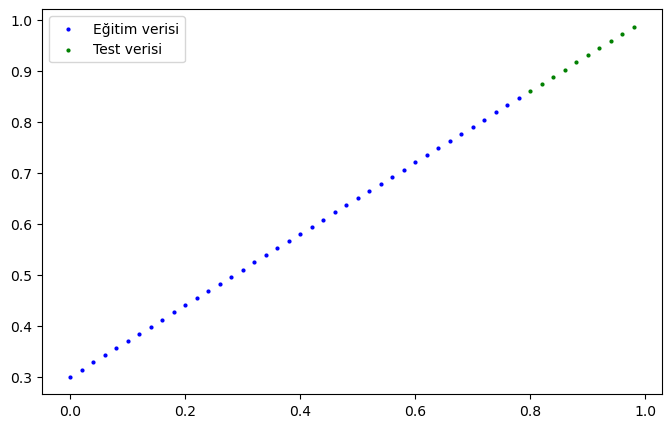

In [10]:
# Fonksiyonu çağıralım. Eğitim verileri mavi nokta, test verileri yeşil nokta ile çıkacaktır. 
plot_predictions()

İyi oluşturulan bir makine öğrenmesi modeli tahminleri sayesinde yeşil noktalar üzerinde kırmızı noktalar olmalıdır.

## 4. Doğrusal (Lineer) Regresyon ile Makine Öğrenmesi Modelini Oluşturmak

Model kısaca aşağıdaki iki adımı gerçekleştirecektir.

1. Rastgele ağırlık (weight) ve *bias* değeri ile başlanır.
2. Eğitim verilerine bakılır ve bu rastgele verileri daha iyi temsillere dönüştürülür. Daha iyi temsillerden kasıt yukardaki verileri oluştururken *bilinen* olarak adlandırılan ağırlık 0.7 ve *bias* 0.3 değerleridir. Amacımız rastgele başlattığımız değerleri bu değerlere yaklaştırmak ve belki de tam olarak bu değerleri bulmaktır. 

Bunun için iki algoritma kullanılabilir. 

1. Gradyan iniş algoritması (Gradient descent algorithm)
2. Geri yayılım algoritması (Backpropagation algorithm)

Aşağıdaki modelde __requires_grad parametresinin True olarak ayarlanması__ gerekmektedir. PyTorch bu iki parametrenin gradyanlarını kullanır. Daha sonra yukarıdaki algoritmaların kombinasyonu ile bu iki parametre istenilen yönde güncellenecektir.

In [11]:
# Doğrusal regresyon modeli sınıfını oluşturmak.
# nn.Module sınıfından kalıtım (inheritance) uygulamalıyız.
# PyTorch içerisindeki birçok şey nn.Module'dan miras alınır.
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() # Üst sınıfın (nn.Module) init() öğesini kullanmak için yazılmalıdır.
        # Rastgele ağırlık başlatırız ve doğru değerine doğru güncellenir.
        self.weight = nn.Parameter(torch.randn(1,
                                                requires_grad = True, # <- Gradyan iniş ile parametre güncellensin mi?
                                                dtype = torch.float)) # PyTorch'da float32 veri tipi.
        
        # Rastgele *bias* başlatırız ve doğru değerine doğru güncellenir.
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad = True, # Gradyan iniş ile parametre güncellensin mi?
                                             dtype = torch.float)) # PyTorch'da float32 veri tipi.
        
    # Modelde hesaplama için tanımlanan bir *forward* metotu.
    # x giriş ya da eğitim verisidir.
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weight * x + self.bias # Doğrusal regresyon formülü.
    

Yukarıdaki kod bloğu için bilgiler;

- **nn.Module:** Sinir ağları için oluşturulmuş yapıları (building blocks) içerir. Doğrusal regresyon model sınıfımız bunu miras (inheritance) alarak bunun bir alt sınıfıdır (subclass).
- **requires_grad = True:** Bu genelde True olarak ayarlanır. PyTorch ilgili parametre için yaptığı hesaplamalarda gradyan inişini (descent) ve **torch.autograd** yapısını kullanır.
- **forward()**: nn.Module miras alınıyorsa her alt sınıf yani model bu metotu **ezmelidir (override).**

- Gradyan iniş için ek bir kaynak: https://www.youtube.com/watch?v=IHZwWFHWa-w
- Geri yayılım (backpropagation) için ek bir kaynak: https://www.youtube.com/watch?v=Ilg3gGewQ5U

## 5. PyTorch Model Oluşturma Temelleri

- **torch.nn:** Hesaplamalı graflar için oluşturulan yapıları içerir. Burada sinir ağları bir hesaplamalı graflar olarak da geçebilir.
- **torch.nn.Parameter:** torch.nn'den bir PyTorch katmanının (layer) modelimizde deneme (try) ve öğrenme (learn) işlemlerini yapacağı parametrelerdir.
- **torch.nn.Module:** Sinir ağları modelleri için bir temel (base) sınıftır. Bunu miras (inheritance) olarak aldığımızda **forward()** metotunu ezmeliyiz (override).
- **torch.optim:** Çeşitli optimizasyon algoritmalarını içerir. nn.Parameter içerisinde bulunan model parametrelerinin gradyan inişi iyileştirmek ve sonucunda kaybı (loss) azaltmak için güncellenme şekli belirlenir. PyTorch içerisinde optimize ediciler buradadır. Gradyan iniş (descent) ile kullanılırlar.
- **def forward():** nn.Module alt sınıfları (subclass), nn.Module'ı miras alan tüm sınıflar bu metotu ezmelidir (override). Bu metot parametreler ile birlikte hesaplamayı ifade eder. 

Yukarıdaki örnekten farklı olarak daha karmaşık veri setinin kullanılması durumunda **torch.utils.data.Dataset** ve **torch.utils.data.DataLoader** kullanılır.

- **torch.utils.data.Dataset:** Verilerin etiketler (key - label) ve örnekleri (sample - feature) arasındaki haritalamadır.  Örneğin; görüntü verileri ve ilgili etiketleri (labels).

- **torch.utils.data.DataLoader:** Bir torch veri seti üzerinde Python iterasyonu oluşur.

Ayrıntılı bilgi için adres: https://pytorch.org/tutorials/beginner/ptcheat.html

## 6. PyTorch Çalışma Akışında Kullanılan Başlıca Modüller

#### Veri hazırlama (Verileri tensörlere çevirme) 

- torchvision.transforms (torchvision, PyTorch bilgisayar görü modülüdür.)
- torch.utils.data.Dataset
- torch.utils.data.DataLoader

#### Model oluşturma ya da önceden eğitilmiş (pretrained) modeli kullanma 

- torch.nn
- torch.nn.Module
- torchvision.models
- torch.optim: Veri setini daha iyi hale getirmek için model parametrelerini optimize etmeyi sağlar.

#### Modeli değerlendirmek

- torchmetrics

#### Deney ile geliştirme (iyileştirme)

- torch.utils.tensorboard

## 7. PyTorch Modelinin İçeriğini İncelemek

**.parameters()** kullanarak model parametreleri kontrol edilebilir. 

#### Bir **random seed** oluşturmak

Daha önce bahsedildiği gibi **random seed** yapısı kullanılmadan oluşturulan rastgele parametre içerikleri her çalıştırmada farklı olarak üretilir. 

In [12]:
# Rastgele **random seed** oluşturmak.
torch.manual_seed(42)

# Modelin örneğini oluşturmak. (Bu nn.Module alt sınıfır - subclass.)
model_0 = LinearRegressionModel()

# Model parametrelerini kontrol etmek.
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
# Model parametrelerinin isimlerini almak.
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
# En başta belirlenen ideal verileri hatırlama.
weight, bias

(0.7, 0.3)

İşte buradaki ideal yaklaşım ve amacımız olan şey rastgele başlatılan iki veri **weight** ve **bias** verilerini ideal veriler olan sırası ile **0.7** ve **0.3** verilerine yaklaştırmaktır. Bunun için elimizde olan eğitim verilerini, geri yayılım (backpropagation) ve gradyan inişi (descent) kullanırız. Çoğu durumda bu ideal verilerin ne olduğuna sahip olmayacağımızı bilmeliyiz.

## 8. Çıkarım (Inference) Modu Kullanarak Rastgele Model ile Tahmin (Prediction) Üretmek  

**torch.inference_mode()** ile tahmin üretmek.

**X_test** verilerine dayalı **y_test** tahminleri yaparak modelin tahmin yeteneğini değerlendirebiliriz. Model üzerinden veri iletildiğinde **forward()** metotu kullanılır.

In [15]:
# Model ile tahminleri üretmek.

with torch.inference_mode():
    y_predictions = model_0(X_test)

y_predictions # Yapılan tahminler.

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [17]:
y_test # Gerçek test verileri.

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

#### Yapılan tahminler ile gerçek verileri görselleştirme.

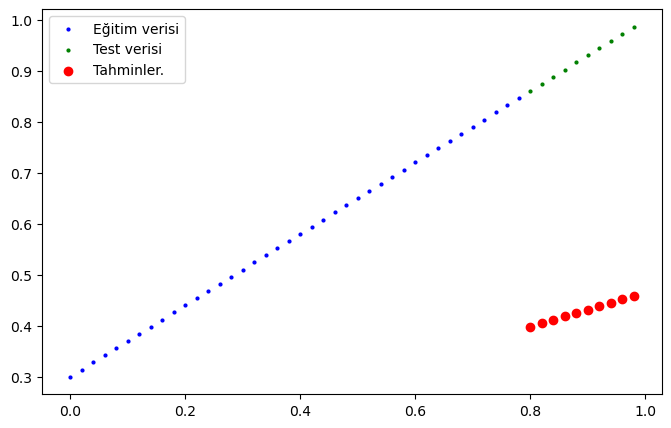

In [18]:
plot_predictions(predictions = y_predictions)

#### Şu noktada model, kırmızı noktalar yeşil test noktalarının üzerinde olmadığı için ideal değildir. Modeli ideal hale getirmek gerekir. Bundan önce aşağıda torch.inference_mode kullanımından bahsedilecektir.

#### torch.inference_mode neden kullanıldı?

In [19]:
# torch.inference_mode kullanılmadan.
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

Görüldüğü üzere tensör çıktısında ikinci eleman olarak *grad fonksiyonu* eklenmiştir. Burada eğitim (train) değil tahmin (test) yapıldığı için **inference_mode()** kullanarak gradyan takibinin (gradient track) kapatılması yapılır. Kısaca bu **inference_mode()** eğitim (train) yapılırken kullanılması gereken işlemleri kapatır ya da devre dışı bırakır. Bunun için aşağıdaki içerik ek bilgi verir.

- https://twitter.com/pytorch/status/1437838231505096708

Yukarıdaki kaynakta da belirtildiği gibi torch.inference_mode() kullanımı **torch.no_grad()** üzerine avantaj oluşturmak için oluşturulmuştur. Tahmin aşağıdaki gibi yapılabilir. **torch.inference_mode()** tercih edilmektedir.

In [21]:
with torch.no_grad():
    y_predictions_with_no_grad = model_0(X_test)

y_predictions_with_no_grad

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])